<a href="https://colab.research.google.com/github/PoserioJed/CCINCOML_EXERCISES_COM23P/blob/main/Copy_of_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 90 images of your self (selfied are recommended) in the Train folder
- Upload 90 images of your partner in the Train folder
- Upload 20 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [4]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

## Mount Google Drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

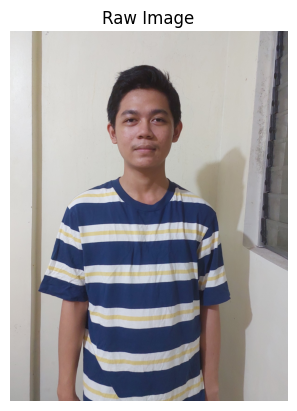

In [17]:
img_path = "/content/drive/MyDrive/Photo/20250921_230112_001.jpg"


raw_img = cv2.imread(img_path)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

plt.imshow(raw_img)
plt.title("Raw Image")
plt.axis("off")
plt.show()

## 2. Load the images from your drive and apply preprocessing to your raw images

In [18]:
def preprocess_image(img, size=(128,128)):
    img = cv2.resize(img, size)
    img = img / 255.0
    return img


## 3. Display one pre-processed image from the training set

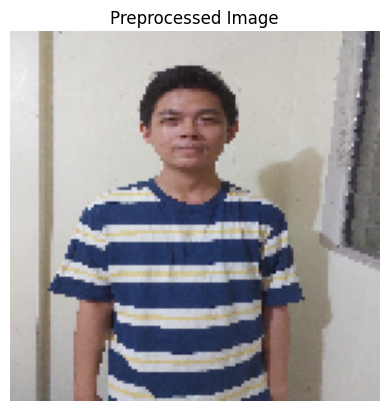

In [19]:
processed_img = preprocess_image(raw_img)
plt.imshow(processed_img)
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()

## 4. Display ten pre-processed images from the training set

Dataset loaded: (210, 128, 128) (210,)


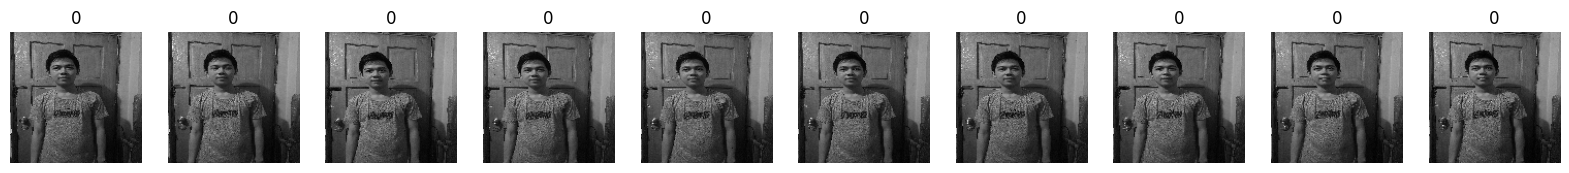

In [27]:
dataset_path = "/content/drive/MyDrive/Photo"

X = []
y = []

for file in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, file)
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.resize(img, (128,128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(img)
    y.append(0)


X = np.array(X)
y = np.array(y)

print("Dataset loaded:", X.shape, y.shape)

fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(X[i], cmap='gray')  # since preprocessed to grayscale
    axes[i].set_title(f"{y[i]}")       # show label above each image
    axes[i].axis('off')

plt.show()
plt.close(fig)


## 5. Split your training data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Unique labels in training set:", np.unique(y_train))
print("Unique labels in testing set:", np.unique(y_test))

Unique labels in training set: [210 211 212]
Unique labels in testing set: [210 211 212]


## 6. Train your SVM model

In [37]:
dataset_path = '/content/drive/MyDrive/Photo'

X, y = [], []


classes = sorted(os.listdir(dataset_path))


label_map = {cls: idx for idx, cls in enumerate(classes)}
print("Label mapping:", label_map)


for cls in classes:
    folder_path = os.path.join(dataset_path, cls)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # resize for consistency
                X.append(img)
                y.append(label_map[cls])

X = np.array(X)
y = np.array(y)

print("Unique labels in y:", np.unique(y))


Label mapping: {'20250921_230112_001.jpg': 0, '20250921_230112_002.jpg': 1, '20250921_230112_003.jpg': 2, '20250921_230112_004.jpg': 3, '20250921_230112_005.jpg': 4, '20250921_230112_006.jpg': 5, '20250921_230112_007.jpg': 6, '20250921_230112_008.jpg': 7, '20250921_230112_009.jpg': 8, '20250921_230112_010.jpg': 9, '20250921_230112_011.jpg': 10, '20250921_230112_012.jpg': 11, '20250921_230112_013.jpg': 12, '20250921_230112_014.jpg': 13, '20250921_230112_015.jpg': 14, '20250921_230112_016.jpg': 15, '20250921_230112_017.jpg': 16, '20250921_230112_018.jpg': 17, '20250921_230112_019.jpg': 18, '20250921_230112_020.jpg': 19, '20250921_230112_021.jpg': 20, '20250921_230112_022.jpg': 21, '20250921_230112_023.jpg': 22, '20250921_230112_024.jpg': 23, '20250921_230112_025.jpg': 24, '20250921_230112_026.jpg': 25, '20250921_230112_027.jpg': 26, '20250921_230112_028.jpg': 27, '20250921_230112_029.jpg': 28, '20250921_230112_030.jpg': 29, '20250921_230213_001.jpg': 30, '20250921_230213_002.jpg': 31, '2

## 7. Evaluate your SVM model

In [38]:
from sklearn.svm import SVC

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_flat, y_train)


SVC(kernel='linear', probability=True, random_state=42)

## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         210       1.00      1.00      1.00        18
         211       1.00      1.00      1.00        18
         212       1.00      1.00      1.00         6

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



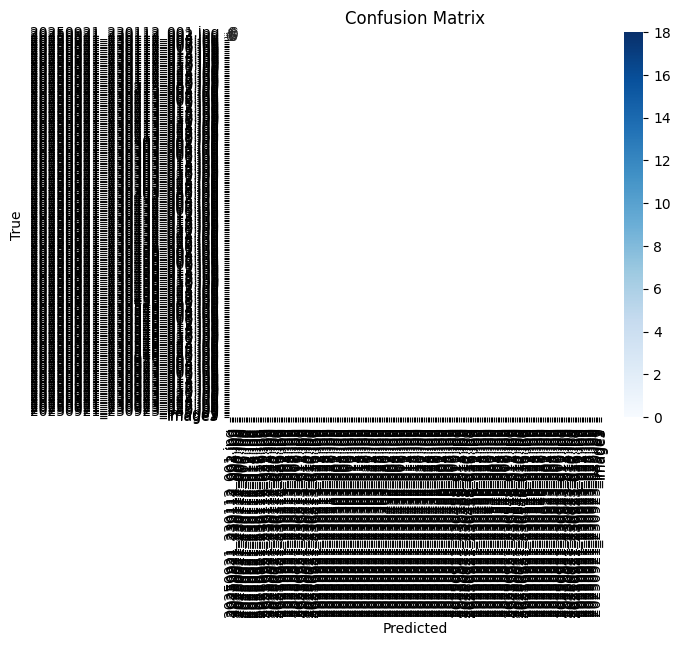

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X_test_flat = X_test.reshape(X_test.shape[0], -1)

y_pred = svm_model.predict(X_test_flat)


print("Test Accuracy:", accuracy_score(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
